<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/DBSCAN(Wholesale_customers_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files=files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("Wholesale customers data.csv");

print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [5]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [6]:
stscaler = StandardScaler().fit(df)
X = stscaler.transform(df)

In [7]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [79]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [80]:
indices

array([[  0,   5],
       [  1, 244],
       [  2, 218],
       [  3, 278],
       [  4,  36],
       [  5, 281],
       [  6,  84],
       [  7, 415],
       [  8,  55],
       [  9, 306],
       [ 10, 346],
       [ 11, 394],
       [ 12,  14],
       [ 13,  67],
       [ 14, 335],
       [ 15, 199],
       [ 16, 175],
       [ 17, 372],
       [ 18, 127],
       [ 19, 297],
       [ 20, 300],
       [ 21, 326],
       [ 22,  40],
       [ 23, 171],
       [ 24,   4],
       [ 25,   6],
       [ 26, 115],
       [ 27,  58],
       [ 28,  45],
       [ 29, 129],
       [ 30,  18],
       [ 31, 386],
       [ 32, 432],
       [ 33, 276],
       [ 34, 362],
       [ 35, 214],
       [ 36,  89],
       [ 37, 426],
       [ 38, 301],
       [ 39, 258],
       [ 40,  22],
       [ 41,  20],
       [ 42, 268],
       [ 43, 205],
       [ 44, 221],
       [ 45,  28],
       [ 46, 306],
       [ 47,  61],
       [ 48, 298],
       [ 49, 163],
       [ 50,  64],
       [ 51,   8],
       [ 52,

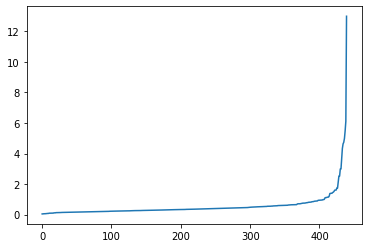

In [81]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [149]:
dbscan = DBSCAN(eps=0.49, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.49, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [133]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1,  1, -1, -1, -1, -1,  0,  1,  0, -1, -1,  0, -1, -1, -1,  0,  1,
       -1, -1,  0, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,
        0,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0, -1, -1,  0,  0, -1, -1,  0,  1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  1,  0, -1, -1,  0,  0,  0, -1,  1,  0, -1,
       -1, -1, -1,  0, -1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1,
        1, -1,  0,  0, -1, -1,  1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  1, -1, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0,
       -1, -1,  1, -1,  0,  1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,
       -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  1,  1, -1, -1,  0, -1,  0,  0,
       -1,  0,  0,  0,  0

In [150]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [115]:
cl

,cluster
0,0
1,0
2,-1
3,0
4,-1
...,...
435,-1
436,-1
437,-1
438,0


In [151]:
cl.value_counts()

cluster
-1         237
 0         186
 1          17
dtype: int64

In [19]:
pd.concat([df,cl],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,-1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,0


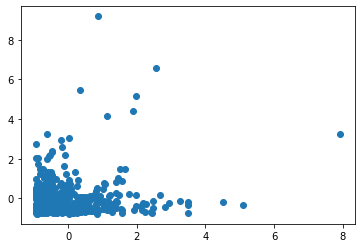

In [157]:
plt.scatter(X[:,0], X[:,1])

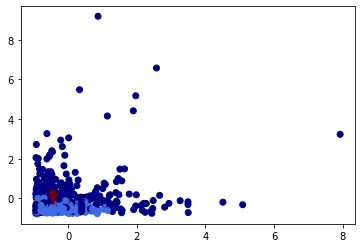

In [155]:
from matplotlib import pyplot as plt
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(dbscan.labels_))